# Connecting google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


# Load training dataset

In [ ]:
import pickle
import json
with open("/content/drive/MyDrive/Colab Notebooks/Emoji Prediction/X_train.pkl", "rb") as f:
  X_train = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Emoji Prediction/y_train.pkl", "rb") as f:
  y_train = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Emoji Prediction/tokenizer.pkl", "rb") as f:
  tokenizer = pickle.load(f)

with open("/content/drive/MyDrive/Colab Notebooks/Emoji Prediction/emojiMap.json", "r") as f:
  map = json.load(f)

In [ ]:
X_train[0], X_train.shape

(array([  500,  6131, 15085,  4824,  1594, 22918, 22919,    88,  1168,
          213,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0], dtype=int32),
 (70000, 32))

In [ ]:
y_train[:5], y_train.shape

(array([0, 1, 2, 3, 3]), (70000,))

# Model building

In [ ]:
from keras import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout

In [ ]:
model = Sequential([
    Embedding(input_dim=80000, output_dim=2, input_length=32),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(20, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 2)             160000    
                                                                 
 lstm_2 (LSTM)               (None, 32, 128)           67072     
                                                                 
 dropout_2 (Dropout)         (None, 32, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 248340 (970.08 KB)
Trainable params: 248

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Training

In [ ]:
history = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
2188/2188 [==============================] - 30s 12ms/step - loss: 2.7200 - accuracy: 0.2174
Epoch 2/40
2188/2188 [==============================] - 19s 9ms/step - loss: 2.5348 - accuracy: 0.2557
Epoch 3/40
2188/2188 [==============================] - 20s 9ms/step - loss: 2.4072 - accuracy: 0.2935
Epoch 4/40
2188/2188 [==============================] - 18s 8ms/step - loss: 2.2968 - accuracy: 0.3215
Epoch 5/40
2188/2188 [==============================] - 19s 9ms/step - loss: 2.2026 - accuracy: 0.3370
Epoch 6/40
2188/2188 [==============================] - 18s 8ms/step - loss: 2.1083 - accuracy: 0.3546
Epoch 7/40
2188/2188 [==============================] - 18s 8ms/step - loss: 2.0083 - accuracy: 0.3813
Epoch 8/40
2188/2188 [==============================] - 19s 9ms/step - loss: 1.9176 - accuracy: 0.4070
Epoch 9/40
2188/2188 [==============================] - 18s 8ms/step - loss: 1.8350 - accuracy: 0.4324
Epoch 10/40
2188/2188 [==============================] - 18s 8ms/step - 

In [ ]:
history_ = model.fit(X_train, y_train, epochs=40)

Epoch 1/40
2188/2188 [==============================] - 18s 8ms/step - loss: 0.8874 - accuracy: 0.7505
Epoch 2/40
2188/2188 [==============================] - 18s 8ms/step - loss: 0.8817 - accuracy: 0.7531
Epoch 3/40
2188/2188 [==============================] - 19s 9ms/step - loss: 0.8738 - accuracy: 0.7540
Epoch 4/40
2188/2188 [==============================] - 18s 8ms/step - loss: 0.8656 - accuracy: 0.7559
Epoch 5/40
2188/2188 [==============================] - 20s 9ms/step - loss: 0.8579 - accuracy: 0.7589
Epoch 6/40
2188/2188 [==============================] - 17s 8ms/step - loss: 0.8533 - accuracy: 0.7601
Epoch 7/40
2188/2188 [==============================] - 17s 8ms/step - loss: 0.8447 - accuracy: 0.7619
Epoch 8/40
2188/2188 [==============================] - 19s 9ms/step - loss: 0.8425 - accuracy: 0.7640
Epoch 9/40
2188/2188 [==============================] - 18s 8ms/step - loss: 0.8370 - accuracy: 0.7635
Epoch 10/40
2188/2188 [==============================] - 18s 8ms/step - l

# Visualization

In [ ]:
loss = history.history['loss']
for i in history_.history['loss']:
  loss.append(i)

accuracy = history.history['accuracy']
for i in history_.history['accuracy']:
  accuracy.append(i)

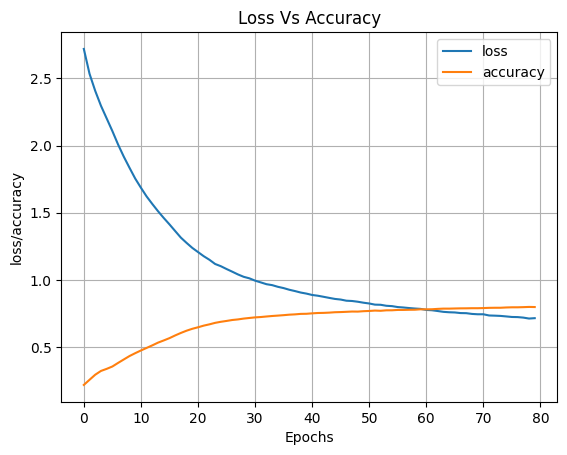

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(loss)-40)], loss[:80], label="loss")
plt.plot([i for i in range(len(accuracy)-40)], accuracy[:80], label="accuracy")
plt.title("Loss Vs Accuracy")
plt.xlabel("Epochs")
plt.ylabel("loss/accuracy")
plt.grid()
plt.legend()
plt.show()

# Prediction

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from keras.utils import pad_sequences
import re
import numpy as np
def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = tweet.strip()
    return tweet

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text) # same as split function
  filteredTokens = [token.lower() for token in tokens if token.lower() not in stop_words]
  filteredTokens = [preprocess_tweet(token) for token in filteredTokens if len(token) > 1]
  res = ' '.join(filteredTokens)
  return res

In [ ]:
def prediction(text):
  preprocess_text = [remove_stopwords(text)]
  seq = tokenizer.texts_to_sequences(preprocess_text)
  seq = pad_sequences(seq, padding="post", maxlen=32)
  predict = model.predict(seq)
  label = np.argmax(predict)
  return map[f'{label}']

In [ ]:
text = "what a sun shine day"
prediction(text)

[[220, 849, 8]]
1/1 [==============================] - 0s 19ms/step


'☀'

In [ ]:
text = "you are so funny"
prediction(text)

1/1 [==============================] - 0s 20ms/step


'😂'

In [ ]:
text = "red heart"
prediction(text)

1/1 [==============================] - 0s 108ms/step


'💕'

# Save model

In [78]:
model.save("/content/drive/MyDrive/Colab Notebooks/Emoji Prediction/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
